# 제품 이상여부 판별 프로젝트

## 각 공정별 소요 시간에 따른 타겟변수 비율 확인

Collect date를 이용하여 확인

In [182]:
import warnings
import pandas as pd

# DtypeWarning 무시
warnings.filterwarnings('ignore', category=pd.errors.DtypeWarning)

# 데이터 파일 경로
file_path_Dam = '../../data/Dam dispensing.csv'
file_path_Fill1 = '../../data/Fill1 dispensing.csv'
file_path_Fill2 = '../../data/Fill2 dispensing.csv'
file_path_AutoClave = '../../data/Auto Clave.csv'
file_path_target = '../../data/train_y.csv'

# 데이터 파일 읽기
df_Dam = pd.read_csv(file_path_Dam) 
df_Fill1 = pd.read_csv(file_path_Fill1) 
df_Fill2 = pd.read_csv(file_path_Fill2) 
df_AutoClave = pd.read_csv(file_path_Fill2) 
df_target = pd.read_csv(file_path_target) 

In [190]:
# 각 데이터프레임 생성
Dam_combined = df_Dam[['Collect Date', 'Set ID']]
AutoClave_combined = df_AutoClave[['Collect Date', 'Set ID']]
Fill1_combined = df_Fill1[['Collect Date', 'Set ID']]
Fill2_combined = df_Fill2[['Collect Date', 'Set ID']]
df_target = df_target[['target', 'Set ID']] # 모든 칼럼 다 가져온것 

# 각 데이터프레임 생성 및 열 이름 변경
Dam_combined = df_Dam[['Collect Date', 'Set ID']].rename(columns={'Collect Date': 'Collect Date_Dam'})
AutoClave_combined = df_AutoClave[['Collect Date', 'Set ID']].rename(columns={'Collect Date': 'Collect Date_AutoClave'})
Fill1_combined = df_Fill1[['Collect Date', 'Set ID']].rename(columns={'Collect Date': 'Collect Date_Fill1'})
Fill2_combined = df_Fill2[['Collect Date', 'Set ID']].rename(columns={'Collect Date': 'Collect Date_Fill2'})
df_target = df_target[['target', 'Set ID']]

Fill2 와 AutoClave의 Collect Date 동일함을 아래 코드로 확인

In [194]:
Fill2_combined.tail()

,Collect Date_Fill2,Set ID
62313,2024-04-28 18:33:41,OP753345054040002685
62314,2024-04-28 18:34:43,OP753345054040002686
62315,2024-04-28 18:35:50,OP753345054040002687
62316,2024-04-28 18:36:34,OP753345054040002688
62317,2024-04-28 18:37:38,OP753345054040002689


In [195]:
AutoClave_combined.tail()

,Collect Date_AutoClave,Set ID
62313,2024-04-28 18:33:41,OP753345054040002685
62314,2024-04-28 18:34:43,OP753345054040002686
62315,2024-04-28 18:35:50,OP753345054040002687
62316,2024-04-28 18:36:34,OP753345054040002688
62317,2024-04-28 18:37:38,OP753345054040002689


4개의 공정 및 target 값 데이터프레임 하나로 병합

In [196]:
# 데이터프레임 병합
df_collect_date = Dam_combined.merge(AutoClave_combined, on='Set ID')
df_collect_date = df_collect_date.merge(Fill1_combined, on='Set ID')
df_collect_date = df_collect_date.merge(Fill2_combined, on='Set ID')
df_collect_date = df_collect_date.merge(df_target, on='Set ID')

In [202]:
df_collect_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83068 entries, 0 to 83067
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Set ID                  83068 non-null  object
 1   target                  83068 non-null  object
 2   Time_Dam                83068 non-null  int32 
 3   Time_Fill1              83068 non-null  int32 
 4   Time_Fill2              83068 non-null  int32 
 5   Collect Date_Dam        83068 non-null  object
 6   Collect Date_Fill1      83068 non-null  object
 7   Collect Date_Fill2      83068 non-null  object
 8   Collect Date_AutoClave  83068 non-null  object
dtypes: int32(3), object(6)
memory usage: 5.4+ MB


In [200]:
import pandas as pd

# Collect Date 열을 datetime 형식으로 변환
df_collect_date['Collect Date_Dam_date'] = pd.to_datetime(df_collect_date['Collect Date_Dam'])
df_collect_date['Collect Date_Fill1_date'] = pd.to_datetime(df_collect_date['Collect Date_Fill1'])
df_collect_date['Collect Date_Fill2_date'] = pd.to_datetime(df_collect_date['Collect Date_Fill2'])
df_collect_date['Collect Date_AutoClave_date'] = pd.to_datetime(df_collect_date['Collect Date_AutoClave'])

# Time_Dam, Time_Fill1, Time_Fill2 파생 변수 생성
df_collect_date['Time_Dam'] = (df_collect_date['Collect Date_Fill1_date'] - df_collect_date['Collect Date_Dam_date']).dt.total_seconds().astype(int)
df_collect_date['Time_Fill1'] = (df_collect_date['Collect Date_Fill2_date'] - df_collect_date['Collect Date_Fill1_date']).dt.total_seconds().astype(int)
df_collect_date['Time_Fill2'] = (df_collect_date['Collect Date_AutoClave_date'] - df_collect_date['Collect Date_Fill2_date']).dt.total_seconds().astype(int)


# 생성된 변수 4개 삭제
df_collect_date = df_collect_date.drop(columns=['Collect Date_Dam_date', 'Collect Date_Fill1_date', 'Collect Date_Fill2_date', 'Collect Date_AutoClave_date'])

# 변수 순서 변경
df_collect_date = df_collect_date[['Set ID'
, 'target'
, 'Time_Dam'
, 'Time_Fill1'
, 'Time_Fill2'
, 'Collect Date_Dam'
, 'Collect Date_Fill1'
, 'Collect Date_Fill2'
, 'Collect Date_AutoClave']]

In [201]:
df_collect_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83068 entries, 0 to 83067
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Set ID                  83068 non-null  object
 1   target                  83068 non-null  object
 2   Time_Dam                83068 non-null  int32 
 3   Time_Fill1              83068 non-null  int32 
 4   Time_Fill2              83068 non-null  int32 
 5   Collect Date_Dam        83068 non-null  object
 6   Collect Date_Fill1      83068 non-null  object
 7   Collect Date_Fill2      83068 non-null  object
 8   Collect Date_AutoClave  83068 non-null  object
dtypes: int32(3), object(6)
memory usage: 5.4+ MB


In [203]:
df_collect_date.iloc[0, :]

Set ID                    OP753345013050000003
target                                AbNormal
Time_Dam                                   124
Time_Fill1                                  81
Time_Fill2                                   0
Collect Date_Dam           2023-05-04 09:11:35
Collect Date_Fill1         2023-05-04 09:13:39
Collect Date_Fill2         2023-05-04 09:15:00
Collect Date_AutoClave     2023-05-04 09:15:00
Name: 0, dtype: object

In [204]:
df_collect_date.iloc[10, :]

Set ID                    OP753345013050000035
target                                  Normal
Time_Dam                                   144
Time_Fill1                                  81
Time_Fill2                                   0
Collect Date_Dam           2023-05-05 10:35:55
Collect Date_Fill1         2023-05-05 10:38:19
Collect Date_Fill2         2023-05-05 10:39:40
Collect Date_AutoClave     2023-05-05 10:39:40
Name: 10, dtype: object

위에서 확인한바와 Fill2 와 AutoClave의 Collect Date 같아서  
Time_Fill2 의 시간이 0값을 가짐을 보인다

## 차트 생성 함수

각 공정별로 걸린 시간에 따른 target 값의 비율을 확인

In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_and_plot_target_ratio_bar(df, time_column, thresholds):
    """
    주어진 시간 열에 대해 다양한 임계값을 사용하여 target 값의 비율을 계산하고 막대 차트로 시각화합니다.
    
    Parameters:
    df (pd.DataFrame): 데이터프레임
    time_column (str): 시간 열 이름
    thresholds (list): 임계값 리스트
    """
    target_ratios = []

    for threshold in thresholds:
        # 주어진 임계값 이하인 행들 필터링
        filtered_df = df[df[time_column] <= threshold]
        
        # target 값의 비율 계산
        target_ratio = filtered_df['target'].value_counts(normalize=True)
        target_ratios.append(target_ratio)
    
    # 막대 차트 그리기
    plot_bar_chart(target_ratios, thresholds, time_column)

def plot_bar_chart(data, thresholds, time_column):
    """
    주어진 데이터를 사용하여 막대 차트를 그립니다.
    
    Parameters:
    data (list of pd.Series): 비율 데이터 리스트
    thresholds (list): 임계값 리스트
    time_column (str): 시간 열 이름
    """
    # 데이터프레임 생성
    df = pd.DataFrame(data, index=thresholds).fillna(0)
    
    # 막대 차트 그리기
    df.plot(kind='bar', stacked=True, colormap='viridis')
    plt.title(f'Target Ratio for {time_column}')
    plt.xlabel('Threshold')
    plt.ylabel('Ratio')
    plt.legend(title='Target')
    plt.xticks(rotation=40)  # 가로축 라벨을 30도 기울임
    plt.show()

# 임계값 리스트
thresholds = list(range(0, 201, 10))
# thresholds = [0, 10, 20, 30] # 임의로 지정한 임계값 리스트

### Dam 공정 시간에 따른 target 비율 확인

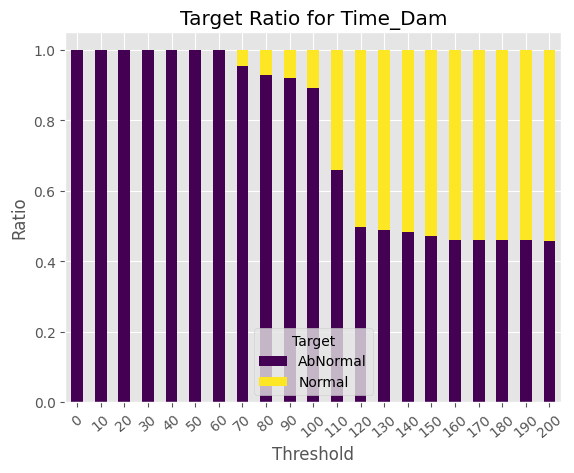

In [208]:
# 시간 열에 대해 target 값의 비율 계산 및 막대 차트 시각화
calculate_and_plot_target_ratio_bar(df_collect_date, 'Time_Dam', thresholds)

2구간으로 나눈다면 -> 110 or 120을 기준으로  
3구간으로 나눈다면 -> 60, 120을 기준으로  
파생변수를 생성할수 있을것으로 보임

예상(해당 값이면 가중치를 부여 변수 느낌)  
ex1 파생변수  
Time_Dam_60 -> 60미만: 0/ 60 이상: 1     
Time_Dam_120 -> 120미만: 0/ 120 이상: 1      
ex2 파생변수    
Time_Dam_new -> 60미만: 0/ 60이상&120미만: 1 /120이상: 2    

### Fill1 공정 시간에 따른 target 비율 확인

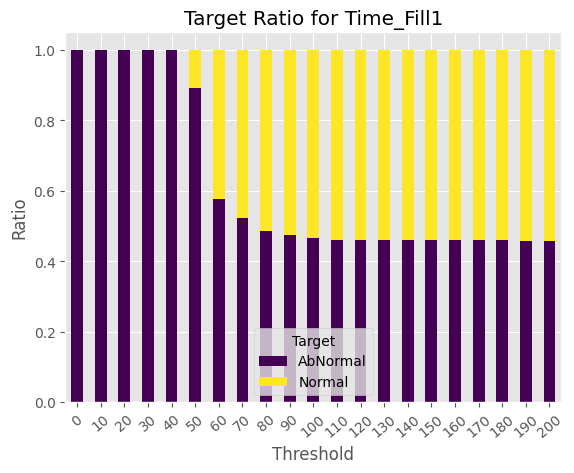

In [209]:
calculate_and_plot_target_ratio_bar(df_collect_date, 'Time_Fill1', thresholds)

2구간으로 나눈다면 -> 50 or 60을 기준으로  
3구간으로 나눈다면 -> 40, 80을 기준으로  
파생변수를 생성할수 있을것으로 보임

### Fill2 공정 시간에 따른 target 비율 확인

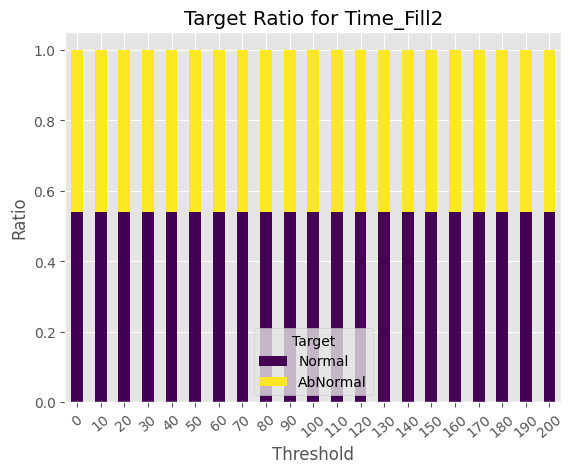

In [210]:
calculate_and_plot_target_ratio_bar(df_collect_date, 'Time_Fill2', thresholds)

시간차 0이라서 비율 일정한것처럼 보임